In [3]:
!pip install xgboost


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Load Dataset
df = pd.read_csv("TASK-ML-INTERN.csv")

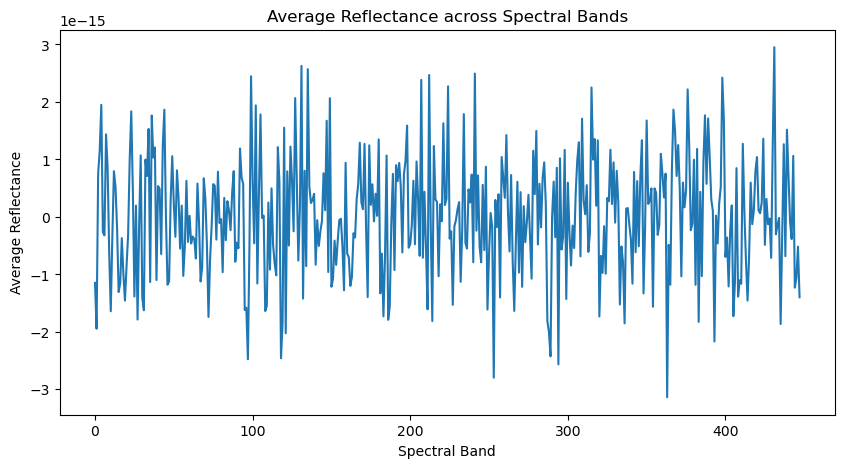

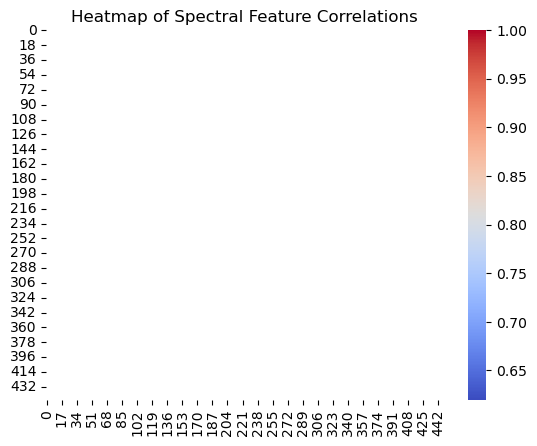

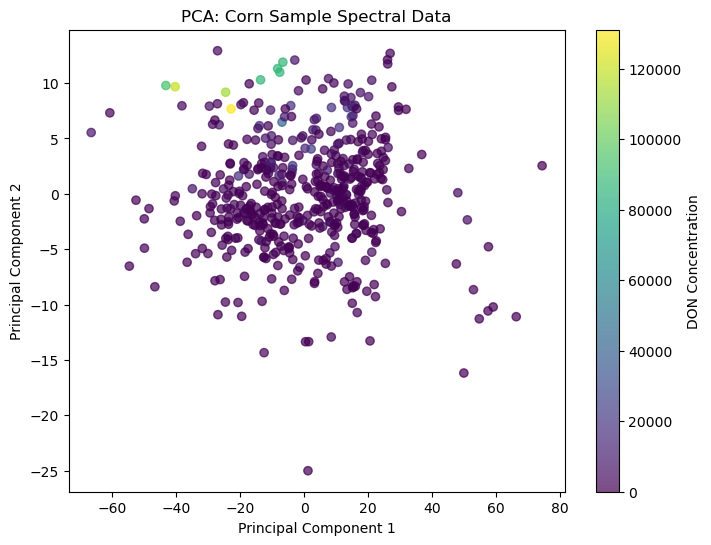

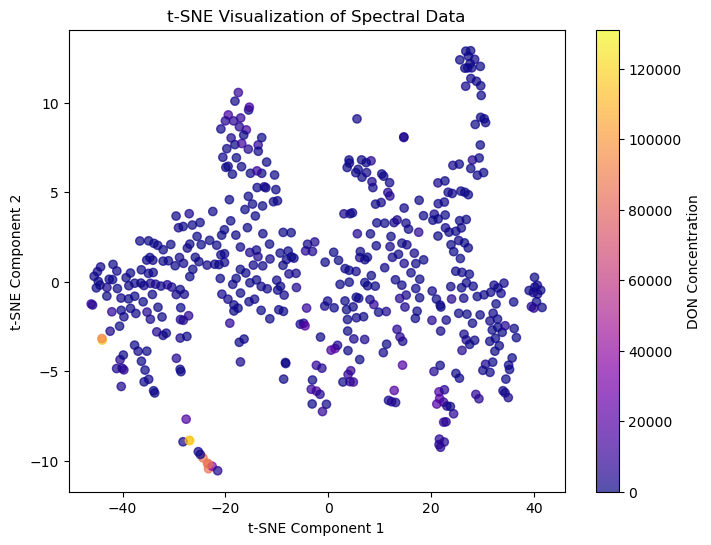

In [ ]:
# Drop non-numeric column (hsi_id)
df.drop(columns=['hsi_id'], inplace=True)

# Check for missing values
df.fillna(df.median(), inplace=True)

# Split features and target
X = df.drop(columns=['vomitoxin_ppb'])
y = df['vomitoxin_ppb']

# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
plt.plot(X_scaled.mean(axis=0))
plt.title('Average Reflectance across Spectral Bands')
plt.xlabel('Spectral Band')
plt.ylabel('Average Reflectance')
plt.show()

sns.heatmap(pd.DataFrame(X_scaled).corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Spectral Feature Correlations")
plt.show()

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizing PCA Components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Corn Sample Spectral Data')
cbar = plt.colorbar(scatter)
cbar.set_label('DON Concentration')
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Spectral Data')
cbar = plt.colorbar(scatter)
cbar.set_label('DON Concentration')
plt.show()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Random Forest with Hyperparameter Tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Model 2: XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Model 3: Neural Network (MLP)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}, R² Score: {r2}")

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_mlp, "Neural Network")

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_mlp, label='Neural Network', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted DON Concentration')
plt.legend()
plt.show()
